In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [2]:
unique, counts = np.unique(y_train, return_counts=True)
print(f"Train labels: {dict(zip(unique, counts))}")
unique, counts = np.unique(y_test, return_counts=True)
print(f"Test labels: {dict(zip(unique, counts))}")

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


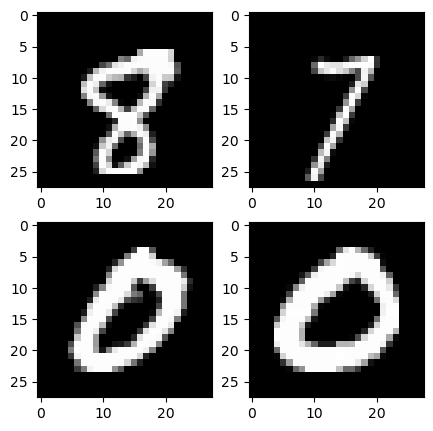

In [3]:
# 4개의 임의표본 추출하기
indices = np.random.randint(0, x_train.shape[0], size=4)
images = x_train[indices]
labels = y_train[indices]

plt.figure(figsize=(5, 5))

for i in range(len(indices)):
    plt.subplot(2, 2, i + 1)
    image = images[i]
    plt.imshow(image, cmap="gray")
    plt.grid(False)
plt.show()

In [4]:
# pre-processing
from tensorflow.keras.utils import to_categorical

num_features = x_train.shape[1] * x_train.shape[2] # 784

x_train = x_train.reshape(-1, num_features).astype('float32')
x_test = x_test.reshape(-1, num_features).astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
num_classes = y_train.shape[1]

(60000, 10)


In [5]:
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(256, input_dim=(num_features)))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [6]:
# validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    partial_x_train, partial_y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

history_out = history.history
history_out.keys()

Epoch 1/10
 45/782 [>.............................] - ETA: 0s - loss: 1.1907 - accuracy: 0.6382  

2024-09-30 15:06:48.137761: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


782/782 [==============================] - 1s 1ms/step - loss: 0.3335 - accuracy: 0.8989 - val_loss: 0.1384 - val_accuracy: 0.9578
Epoch 2/10
782/782 [==============================] - 1s 1ms/step - loss: 0.1656 - accuracy: 0.9495 - val_loss: 0.1070 - val_accuracy: 0.9681
Epoch 3/10
782/782 [==============================] - 1s 1ms/step - loss: 0.1324 - accuracy: 0.9589 - val_loss: 0.1018 - val_accuracy: 0.9689
Epoch 4/10
782/782 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.9646 - val_loss: 0.0929 - val_accuracy: 0.9731
Epoch 5/10
782/782 [==============================] - 1s 1ms/step - loss: 0.1005 - accuracy: 0.9683 - val_loss: 0.0874 - val_accuracy: 0.9752
Epoch 6/10
782/782 [==============================] - 1s 1ms/step - loss: 0.0909 - accuracy: 0.9705 - val_loss: 0.0786 - val_accuracy: 0.9783
Epoch 7/10
782/782 [==============================] - 1s 1ms/step - loss: 0.0831 - accuracy: 0.9735 - val_loss: 0.0777 - val_accuracy: 0.9776
Epoch 8/10
782/78

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

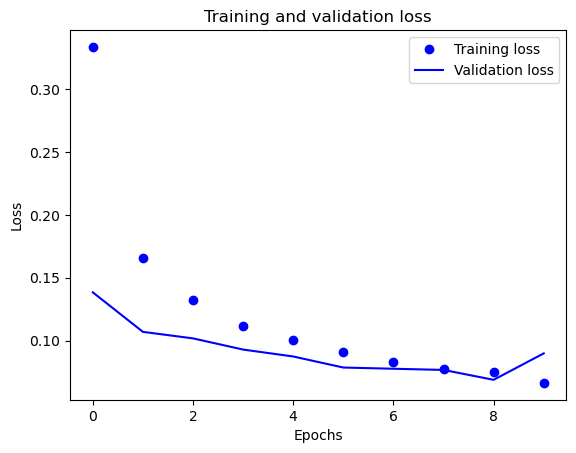

In [8]:
loss = history_out['loss']
val_loss = history_out['val_loss']
accuracy = history_out['accuracy']
val_accuracy = history_out['val_accuracy']

plt.plot(loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

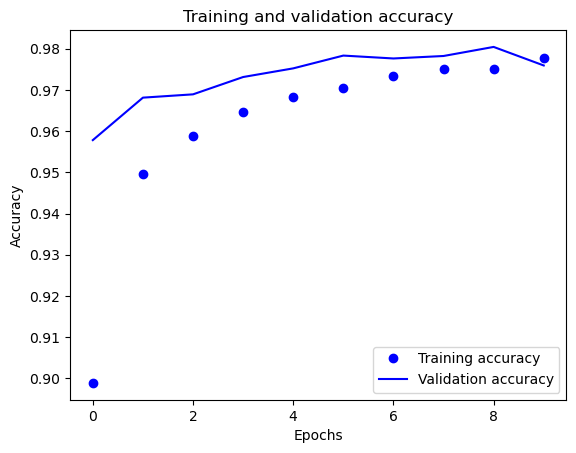

In [9]:
plt.clf() # clf method가 적용된 그래프의 figure를 지운다
plt.plot(accuracy, 'bo', label='Training accuracy')
plt.plot(val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=64,
)

Epoch 1/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0754 - accuracy: 0.9766
Epoch 2/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0677 - accuracy: 0.9789
Epoch 3/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0626 - accuracy: 0.9802
Epoch 4/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0570 - accuracy: 0.9817
Epoch 5/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0608 - accuracy: 0.9803
Epoch 6/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0518 - accuracy: 0.9834
Epoch 7/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0517 - accuracy: 0.9835
Epoch 8/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0495 - accuracy: 0.9840
Epoch 9/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0471 - accuracy: 0.9847
Epoch 10/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0485 - accuracy: 0.9842

In [11]:
train_results = model.evaluate(x_train, y_train, verbose=2)
test_results = model.evaluate(x_test, y_test, verbose=2)

# TensorFlow/Keras에서 model.evaluate()를 사용할 때, 별도로 배치 사이즈를 지정하지 않으면 기본값으로 배치 사이즈가 32로 설정
print(train_results)
print(test_results)

1875/1875 - 1s - loss: 0.0038 - accuracy: 0.9989 - 731ms/epoch - 390us/step
313/313 - 0s - loss: 0.0799 - accuracy: 0.9825 - 118ms/epoch - 376us/step
[0.0038137207739055157, 0.9988666772842407]
[0.07985977083444595, 0.9825000166893005]


In [12]:
import pandas as pd

pred = model.predict(x_test)
pred = pd.DataFrame(pred)
pred.head()

313/313 [==============================] - 0s 367us/step


,0,1,2,3,4,5,6,7,8,9
0,1.999663e-13,1.086976e-09,2.949714e-08,3.310296e-07,2.510849e-09,1.528542e-11,8.910438e-18,9.999996e-01,1.908863e-10,3.692629e-08
1,1.298533e-20,9.779200e-16,1.000000e+00,1.025974e-15,2.017334e-26,6.628726e-19,1.671797e-18,4.515122e-20,1.446867e-21,9.865867e-31
2,1.071045e-14,1.000000e+00,2.381465e-11,1.218992e-16,1.105621e-10,1.448199e-12,2.367117e-09,1.214345e-10,2.197356e-10,1.662395e-14
3,9.999996e-01,9.495920e-14,7.128441e-10,6.388967e-10,1.615738e-10,2.132476e-11,2.987106e-07,2.744511e-12,1.092311e-12,4.902603e-09
4,1.426142e-09,1.497139e-11,9.301390e-09,6.868733e-12,9.999971e-01,7.194696e-11,1.992024e-10,2.766620e-08,2.902481e-12,2.913005e-06


## Functional API

In [13]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

x = Input(shape=(num_features,))
h1 = Dense(256, activation='relu')(x)
h1 = Dropout(0.45)(h1)
h2 = Dense(256, activation='relu')(h1)
out = Dense(num_classes, activation='softmax')(h2)
model = Model(inputs=x, outputs=out)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=35, batch_size=64)

Epoch 1/35
938/938 [==============================] - 1s 1ms/step - loss: 0.3107 - accuracy: 0.9054
Epoch 2/35
938/938 [==============================] - 1s 1ms/step - loss: 0.1561 - accuracy: 0.9528
Epoch 3/35
938/938 [==============================] - 1s 1ms/step - loss: 0.1260 - accuracy: 0.9610
Epoch 4/35
938/938 [==============================] - 1s 1ms/step - loss: 0.1069 - accuracy: 0.9663
Epoch 5/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0940 - accuracy: 0.9702
Epoch 6/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0878 - accuracy: 0.9725
Epoch 7/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0793 - accuracy: 0.9747
Epoch 8/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0736 - accuracy: 0.9770
Epoch 9/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0691 - accuracy: 0.9777
Epoch 10/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0636 - accuracy: 0.9791